In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

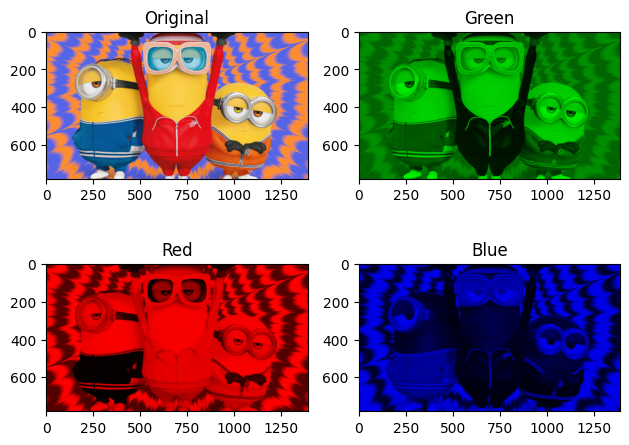

In [7]:
#get the three channels from an image for colour histogram
image = cv2.imread('minions.jpg')

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


#show the images
plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 
    
plt.subplot(2,2,2)
plt.title("Green")
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))

 
plt.subplot(2,2,3)
plt.title("Red")
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))


plt.subplot(2,2,4)
plt.title("Blue")
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

 
plt.tight_layout()
plt.show()

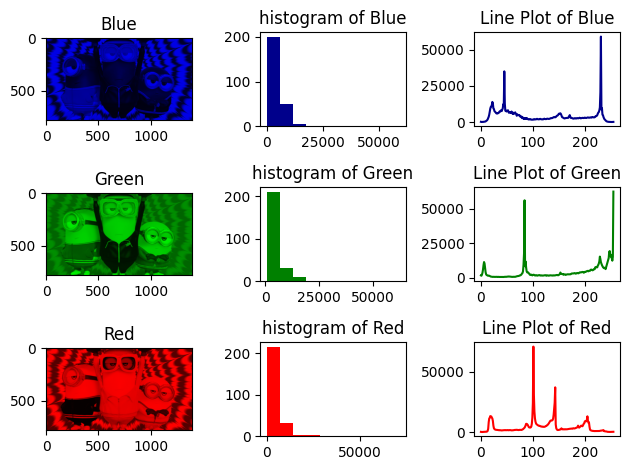

In [8]:
# Get RGB data from image
# cv2.calchist([imageObject], [channelValue], mask, [histSize], [low,high])

blue_color = cv2.calcHist([image], [0], None, [256], [0, 256])
red_color = cv2.calcHist([image], [1], None, [256], [0, 256])
green_color = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(3,3,1)
plt.title("Blue")
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,4)
plt.title("Green")
plt.imshow(cv2.cvtColor(g, cv2.COLOR_BGR2RGB))

plt.subplot(3,3,7)
plt.title("Red")
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))

# three histograms
plt.subplot(3,3,2)
plt.title("histogram of Blue")
plt.hist(blue_color,color="darkblue")
 
plt.subplot(3,3,5)
plt.title("histogram of Green")
plt.hist(green_color,color="green")
 
plt.subplot(3,3,8)
plt.title("histogram of Red")
plt.hist(red_color,color="red")

# three line plots
plt.subplot(3,3,3)
plt.title("Line Plot of Blue")
plt.plot(blue_color,color="darkblue")
 
plt.subplot(3,3,6)
plt.title("Line Plot of Green")
plt.plot(green_color,color="green")
 
plt.subplot(3,3,9)
plt.title("Line Plot of Red")
plt.plot(red_color,color="red")
 
plt.tight_layout()
plt.show()

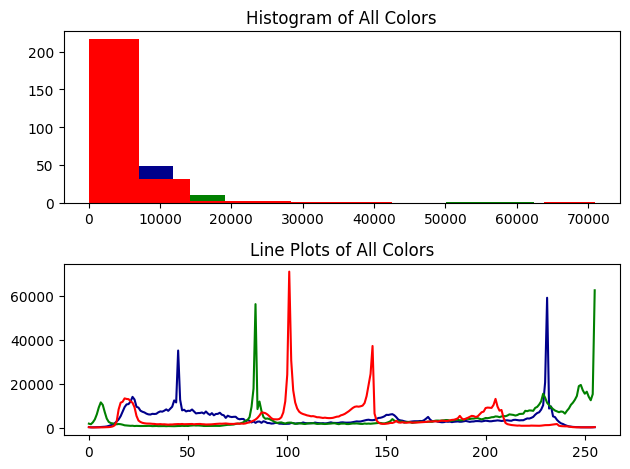

In [9]:
# putting all in one plot
plt.subplot(2,1,1)
plt.title("Histogram of All Colors")
plt.hist(blue_color,color="darkblue")
plt.hist(green_color,color="green")
plt.hist(red_color,color="red")
 
plt.subplot(2,1,2)
plt.title("Line Plots of All Colors")
plt.plot(blue_color,color="darkblue")
plt.plot(green_color,color="green")
plt.plot(red_color,color="red")
 
plt.tight_layout()
plt.show()

([], [])

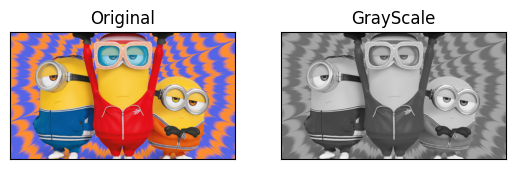

In [10]:
img = cv2.imread('minions.jpg',0)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # convert to grayscale
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(img,cmap='gray') # show the grayscale image
plt.title('GrayScale')
plt.xticks([])
plt.yticks([])

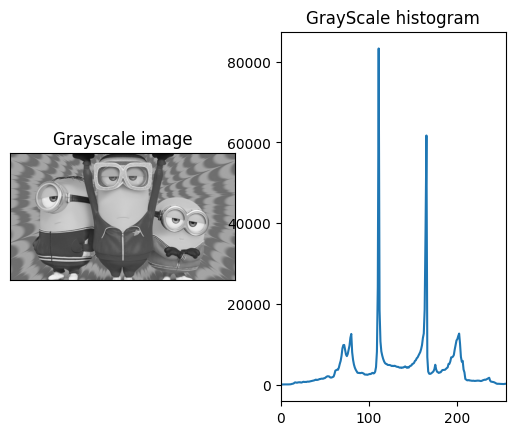

In [11]:
img = cv2.imread('minions.jpg',0)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Grayscale image')
plt.xticks([])
plt.yticks([])

# numpy way of creating the grayscale histogram
plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('GrayScale histogram')
plt.show()

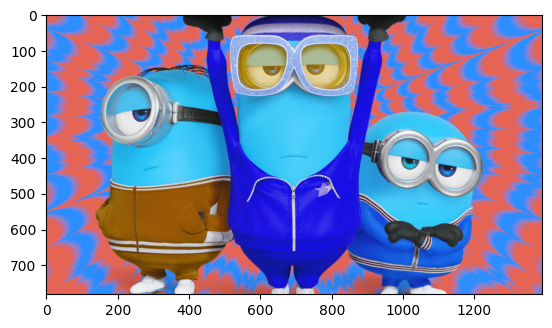

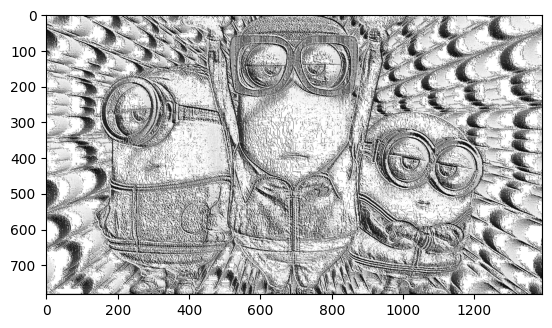

In [12]:
# local Binary Patterns
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = 'minions.jpg'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width), np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()
   


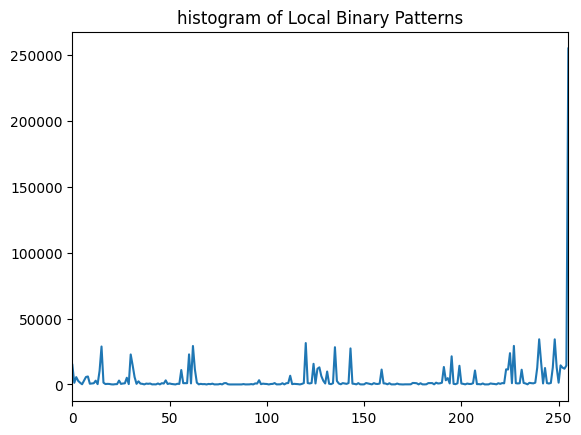

In [13]:
#once we have the local binary patterns, now create the histogram
hist,bin = np.histogram(img_lbp.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram of Local Binary Patterns')
plt.show()


(782, 1390, 3)


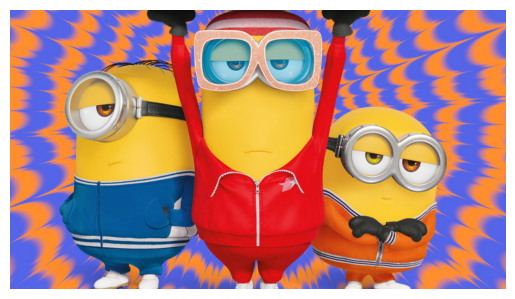

In [14]:
# read the image for HOG
img = imread('minions.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

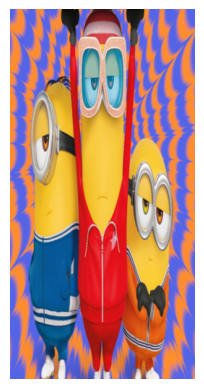

(512, 256, 3)


In [15]:
# resize for HOG
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
plt.show()
print(resized_img.shape)

(70308,)
(512, 256)


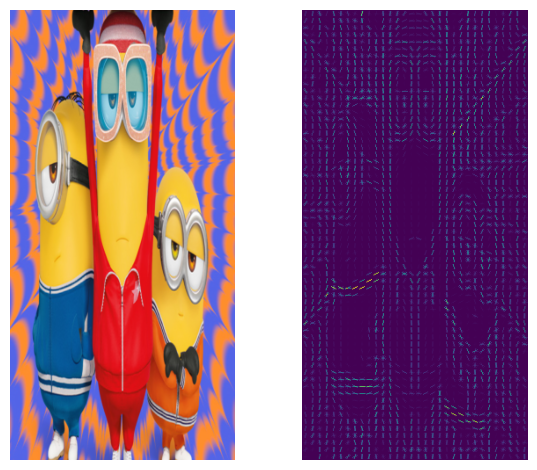

In [17]:

# now let's compute the derivatives in all the directions
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, channel_axis=-1)
print(fd.shape)
print(hog_image.shape)

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(resized_img)
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(hog_image)
plt.tight_layout()
plt.show()

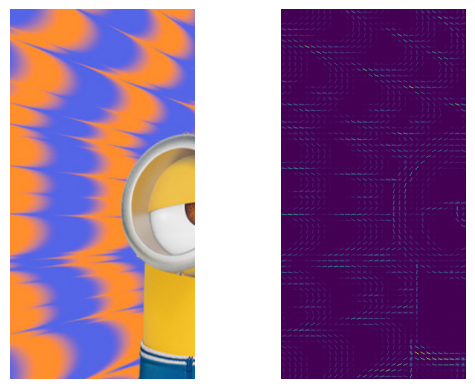

In [18]:
# let's try the HOG for a cropped image
x=0
y=0
h=512
w=256
crop_img = img[y:y+h, x:x+w]
fd_crop_img, hog_crop_img = hog(crop_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, channel_axis=-1)

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(crop_img)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(hog_crop_img)

plt.show()




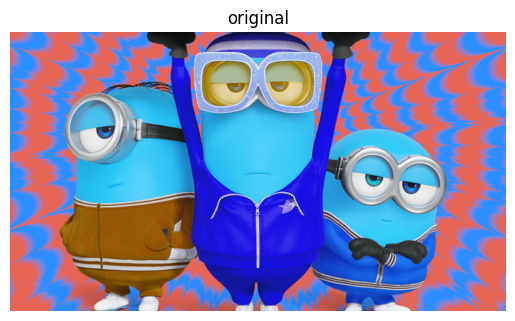

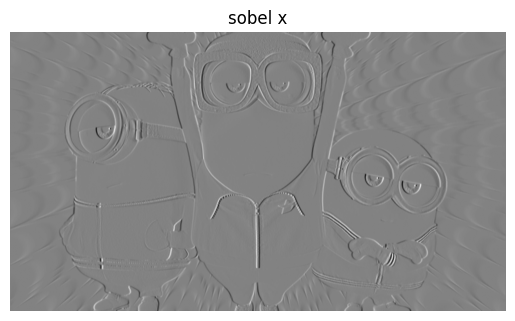

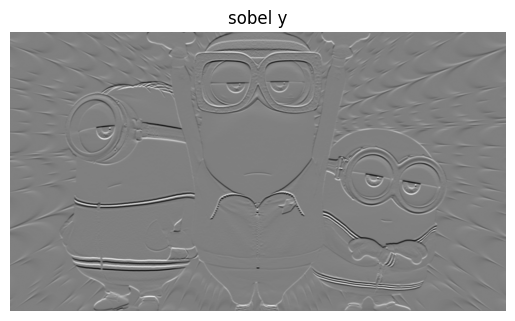

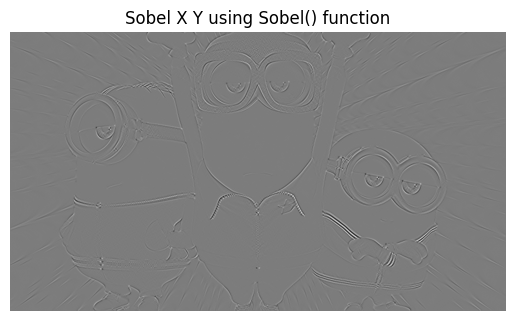

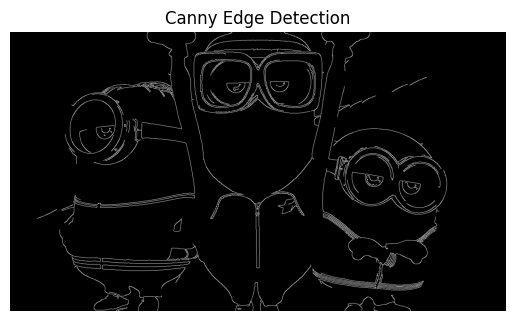

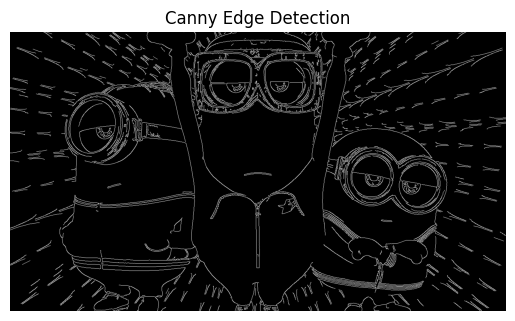

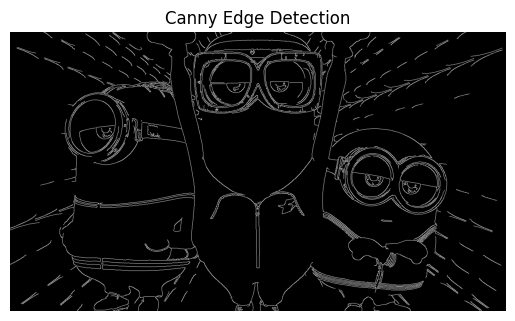

In [19]:
# Read the original image
img = cv2.imread('minions.jpg') 
# Display original image
plt.axis("off")
plt.imshow(img)
plt.title("original")
plt.show()
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
plt.axis("off")
plt.imshow(sobelx, cmap ="gray")
plt.title("sobel x")
plt.show()
plt.axis("off")
plt.imshow(sobely, cmap ="gray")
plt.title("sobel y")
plt.show()
plt.axis("off")
plt.imshow(sobelxy, cmap ="gray")
plt.title("Sobel X Y using Sobel() function")
plt.show()
 
# Canny Edge Detection: the ratio between the two thresholds is recommended 1:2 or 1:3
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.axis("off")
plt.imshow(edges, cmap ="gray")
plt.title("Canny Edge Detection")
plt.show()

# Canny Edge Detection with lower threshold
edges1 = cv2.Canny(image=img_blur, threshold1=50, threshold2=100) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.axis("off")
plt.imshow(edges1, cmap ="gray")
plt.title("Canny Edge Detection")
plt.show()

# Canny Edge Detection with the ratio being 1:3
edges2 = cv2.Canny(image=img_blur, threshold1=50, threshold2=150) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.axis("off")
plt.imshow(edges2, cmap ="gray")
plt.title("Canny Edge Detection")
plt.show()


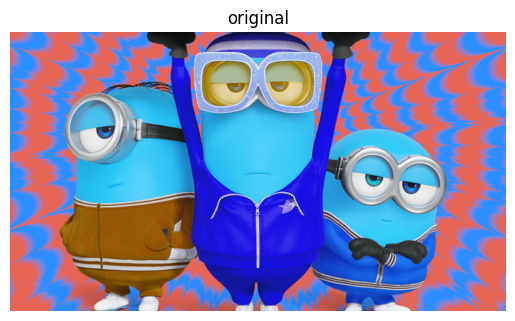

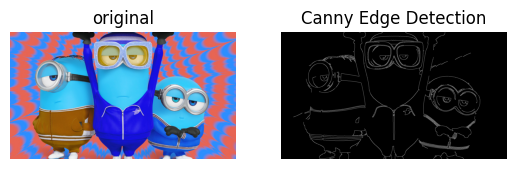

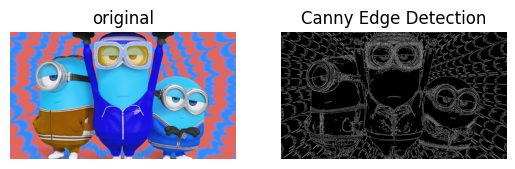

In [20]:
# Read the original image
img = cv2.imread('minions.jpg') 
# Display original image
plt.axis("off")
plt.imshow(img)
plt.title("original")
plt.show()
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)
plt.title("original")
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(edges, cmap ="gray")
plt.title("Canny Edge Detection")
plt.show()


# Canny Edge Detection with very low threshold
edges1 = cv2.Canny(image=img_blur, threshold1=10, threshold2=20) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)
plt.title("original")
plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(edges1, cmap ="gray")
plt.title("Canny Edge Detection")
plt.show()


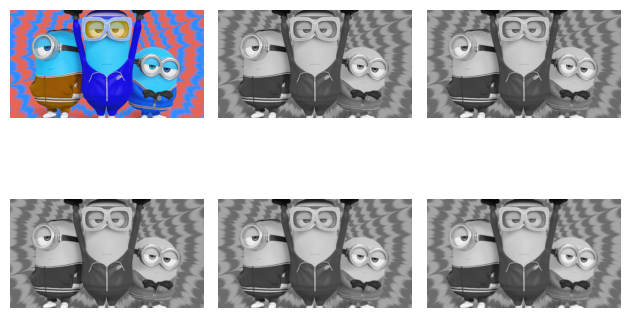

In [21]:
# let's try gaussian smoothing with different size filters

img_blur1 = cv2.GaussianBlur(img_gray, (3,3), 0) 
img_blur2 = cv2.GaussianBlur(img_gray, (5,5), 0) 
img_blur3 = cv2.GaussianBlur(img_gray, (7,7), 0) 
img_blur4 = cv2.GaussianBlur(img_gray, (9,9), 0) 
img_blur5 = cv2.GaussianBlur(img_gray, (11,11), 0) 
plt.subplot(2,3,1)
plt.axis("off")
plt.imshow(img)
plt.subplot(2,3,2)
plt.axis("off")
plt.imshow(img_blur1, cmap ="gray")
plt.subplot(2,3,3)
plt.axis("off")
plt.imshow(img_blur2, cmap ="gray")
plt.subplot(2,3,4)
plt.axis("off")
plt.imshow(img_blur3, cmap ="gray")
plt.subplot(2,3,5)
plt.axis("off")
plt.imshow(img_blur4, cmap ="gray")
plt.subplot(2,3,6)
plt.axis("off")
plt.imshow(img_blur5, cmap ="gray")
plt.tight_layout()
plt.show()

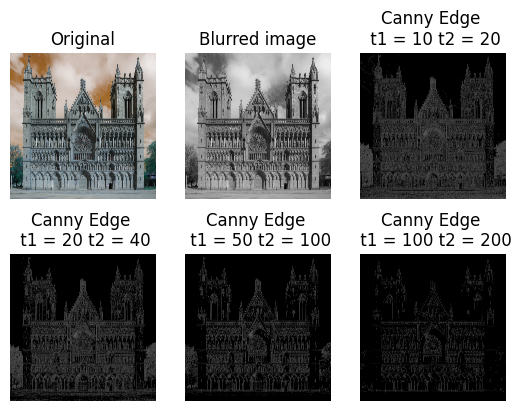

In [23]:
img = cv2.imread('nidaros.jpg') 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (9,9), 0) 
# Canny Edge Detection
edges1 = cv2.Canny(image=img_blur, threshold1=10, threshold2=20) # Canny Edge Detection
edges2 = cv2.Canny(image=img_blur, threshold1=20, threshold2=40) # Canny Edge Detection
edges3 = cv2.Canny(image=img_blur, threshold1=50, threshold2=100) # Canny Edge Detection
edges4 = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
plt.subplot(2,3,1)
plt.axis("off")
plt.imshow(img)
plt.title("Original")
plt.subplot(2,3,2)
plt.axis("off")
plt.imshow(img_blur, cmap ="gray")
plt.title("Blurred image")
plt.subplot(2,3,3)
plt.axis("off")
plt.imshow(edges1, cmap ="gray")
plt.title("Canny Edge \n t1 = 10 t2 = 20")
plt.subplot(2,3,4)
plt.axis("off")
plt.imshow(edges2, cmap ="gray")
plt.title("Canny Edge \n t1 = 20 t2 = 40")
plt.subplot(2,3,5)
plt.axis("off")
plt.imshow(edges3, cmap ="gray")
plt.title("Canny Edge \n t1 = 50 t2 = 100")
plt.subplot(2,3,6)
plt.axis("off")
plt.imshow(edges4, cmap ="gray")
plt.title("Canny Edge \n t1 = 100 t2 = 200")
plt.show()

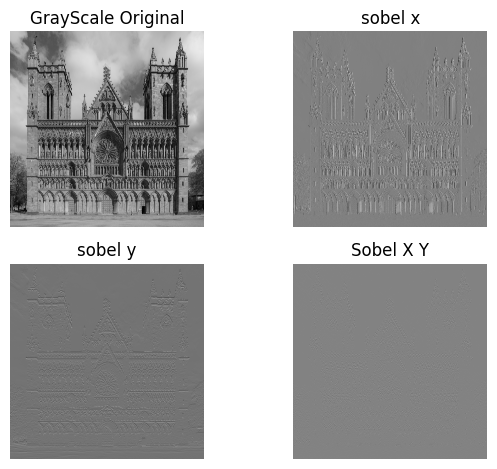

In [24]:
img = cv2.imread('nidaros.jpg') 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (9,9), 0) 


sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=7) # Combined X and Y Sobel Edge Detection

plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(img_gray, cmap ="gray")
plt.title("GrayScale Original")
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(sobelx, cmap ="gray")
plt.title("sobel x")
plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(sobely, cmap ="gray")
plt.title("sobel y")
plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(sobelxy, cmap ="gray")
plt.title("Sobel X Y")
plt.tight_layout()
plt.show()

In [25]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

#read image
im = cv2.imread("BlobTest.jpg", cv2.IMREAD_GRAYSCALE)
 
# Set up the detector with default parameters.
# detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
plt.axis("off")
plt.imshow(im_with_keypoints, cmap ="gray")
plt.show()

[ WARN:0@227.884] global loadsave.cpp:275 findDecoder imread_('BlobTest.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.12.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


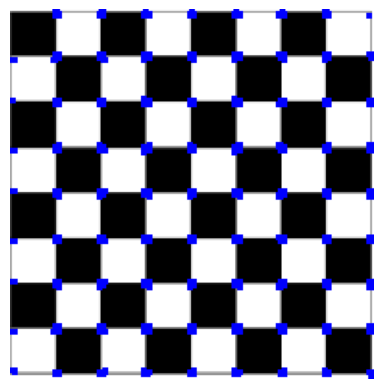

In [26]:
#corner detection
filename = 'chessboard.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]


plt.axis("off")
plt.imshow(img, cmap ="gray")
plt.show()

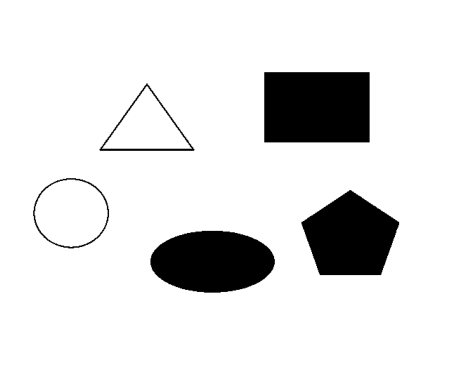

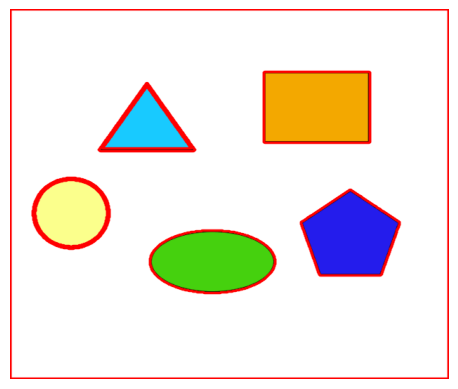

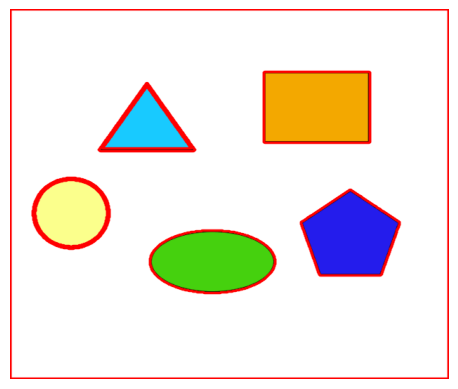

In [28]:
# contour detection with binary images
# read the image 
image = cv2.imread('contour.webp')
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.axis("off")
plt.imshow(thresh, cmap ="gray")
plt.show()

# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE 
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                      
# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
plt.axis("off")
plt.imshow(image_copy, cmap ="gray")
plt.show()

# detect the contours on the binary image using cv2.CHAIN_APPROX_SIMPLE
contours1, hierarchy1 = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy1 = image.copy()
cv2.drawContours(image=image_copy1, contours=contours1, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv2.LINE_AA)
                
# see the results
plt.axis("off")
plt.imshow(image_copy1, cmap ="gray")
plt.show()

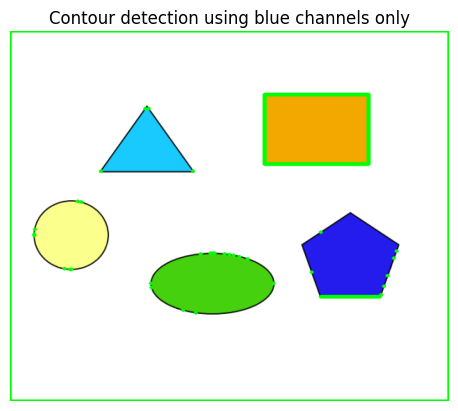

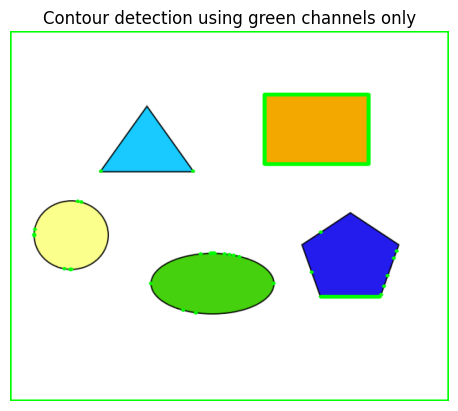

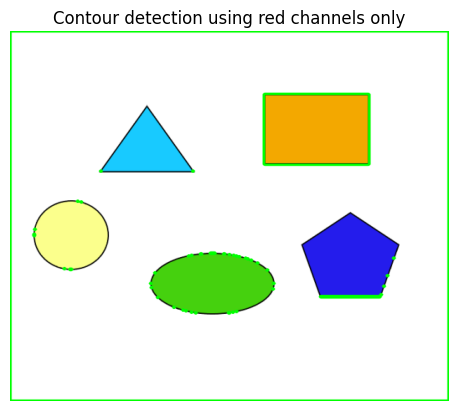

In [29]:
# contour detection with the three channels 
# read the image
image = cv2.imread('contour.webp')
 
# B, G, R channel splitting
blue, green, red = cv2.split(image)
 
# detect contours using blue channel and without thresholding
contours1, hierarchy1 = cv2.findContours(image=blue, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
 
# draw contours on the original image
image_contour_blue = image.copy()
cv2.drawContours(image=image_contour_blue, contours=contours1, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
plt.axis("off")
plt.imshow(image_contour_blue, cmap ="gray")
plt.title("Contour detection using blue channels only")
plt.show()
 
# detect contours using green channel and without thresholding
contours2, hierarchy2 = cv2.findContours(image=green, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_green = image.copy()
cv2.drawContours(image=image_contour_green, contours=contours2, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
plt.axis("off")
plt.imshow(image_contour_green, cmap ="gray")
plt.title("Contour detection using green channels only")
plt.show()
 
# detect contours using red channel and without thresholding
contours3, hierarchy3 = cv2.findContours(image=red, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
image_contour_red = image.copy()
cv2.drawContours(image=image_contour_red, contours=contours3, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
plt.axis("off")
plt.imshow(image_contour_red, cmap ="gray")
plt.title("Contour detection using red channels only")
plt.show()

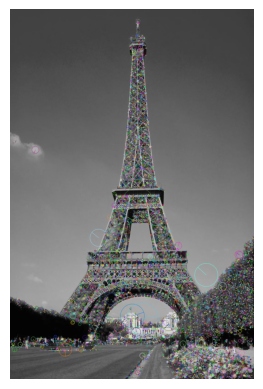

In [30]:
# SIFT key points
img = cv2.imread('eiffel.webp')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.axis("off")
plt.imshow(img)
plt.show()

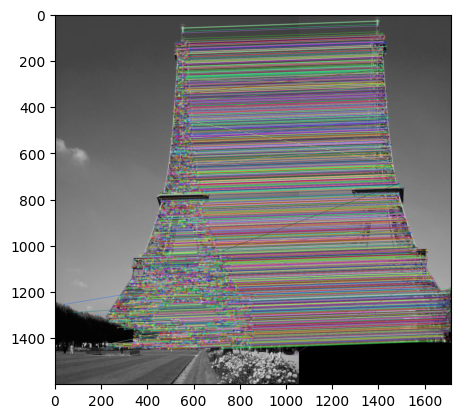

In [31]:
img1 = cv2.imread('eiffel.webp',cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('eiffel-crop.jpg',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
 if m.distance < 0.75*n.distance:
     good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()